In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from astrodust.extinction.bhmie import *
from astrodust.distlib.composition import cmindex as cmi

In [4]:
A   = 0.1 # grain radius, in microns
E   = np.logspace(-1, 1, 100)

In [30]:
bhm = BHmie(A, E, cmi.CmSilicate())

In [31]:
%%time
bhm.calculate()

CPU times: user 8.2 ms, sys: 1.07 ms, total: 9.27 ms
Wall time: 8.15 ms


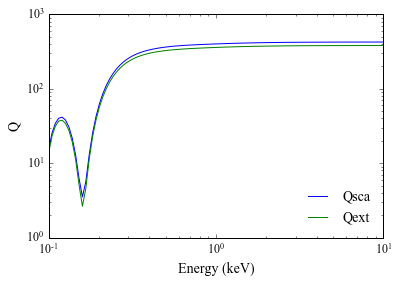

In [32]:
def plot_bhmie(ax, bh):
    ax.plot(E, bhm.Qsca[0,:], label='Qsca')
    ax.plot(E, bhm.Qext[0,:], label='Qext')
    ax.tick_params(labelsize=12)
    plt.legend(loc='lower right', fontsize=14)

ax = plt.subplot(111)
plot_bhmie(ax, bhm)
plt.loglog()
plt.xlabel("Energy (keV)", size=14)
plt.ylabel("Q", size=14)

## Compare it to previous Mie scattering code

In [26]:
from astrodust.extinction.scatmodels import Mie

In [27]:
old_mie = Mie()

In [35]:
%%time
old_qsca = [old_mie.Qsca(A, ener, cmi.CmSilicate()) for ener in E]

CPU times: user 6.38 s, sys: 41.9 ms, total: 6.42 s
Wall time: 6.42 s


In [36]:
%%time
old_qext = [old_mie.Qext(A, ener, cmi.CmSilicate()) for ener in E]

CPU times: user 6.8 s, sys: 21.9 ms, total: 6.83 s
Wall time: 6.85 s


[]

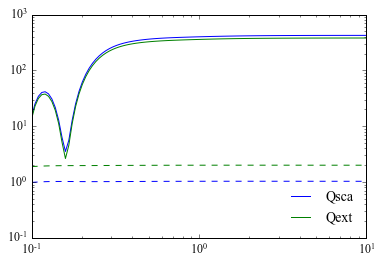

In [39]:
ax = plt.subplot(111)
plot_bhmie(ax, bhm)
plt.plot(E, old_qsca, 'b--')
plt.plot(E, old_qext, 'g--')
plt.loglog()